In [80]:
# Загрузка необходмых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных

Загрузим все данные. Из train.csv будет взять только 20 процентов строк (взяты случайно), тк файл слишком большой и его невозможно обработать из-за нехватки оперативной памяти

In [81]:
# Определение типов данных для train.csv
train_dtypes = {
    'row_id': 'int64',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'float32',
    'answered_correctly': 'float32',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'float32'  
}

cchunksize = 100000  # Количество строк в одном чанке
df_list = []  # Список для хранения частей
sample_fraction = 0.2  # 20% случайной выборки

for chunk in pd.read_csv(
    r'C:\Users\ksaga\Downloads\train.csv',
    dtype=train_dtypes,
    chunksize=chunksize,
    na_values=[-1]
):
    # Выбираем случайные 20% данных в каждом чанке
    chunk_sample = chunk.sample(frac=sample_fraction, random_state=42)
    df_list.append(chunk_sample)

# Конкатенация всех частей
train_df = pd.concat(df_list, ignore_index=True)


In [82]:
# Вывод первых пяти строк train
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,75721,11398613550,1581647,12143,0,141,0.0,1.0,17000.0,1.0
1,80184,5610705829,1765772,8647,0,702,0.0,1.0,41000.0,1.0
2,19864,13205626599,220268,593,0,1228,1.0,1.0,18000.0,1.0
3,76699,244918727,1657235,8345,0,52,2.0,1.0,25000.0,1.0
4,92991,2122352568,2034673,1217,0,229,1.0,1.0,17000.0,1.0


In [83]:
# Загрузка lectures.csv
lectures_df = pd.read_csv(r'C:\Users\ksaga\Downloads\lectures.csv')

In [84]:
# Вывод первых пяти строк lectures
lectures_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [85]:
# Определение типов данных для questions.csv
questions_dtypes = {
    'question_id': 'int32',
    'bundle_id': 'int32',
    'correct_answer': 'int8',
    'part': 'int8',
    'tags': 'str'
}


# Загрузка questions.csv с chunksize
questions_chunks = pd.read_csv(
    r'C:\Users\ksaga\Downloads\questions.csv',
    dtype=questions_dtypes,
    chunksize=100000
)

# Конкатенация всех частей в один DataFrame
questions_df = pd.concat(questions_chunks, ignore_index=True)


In [86]:
# Вывод первых пяти строк questions
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


# 2. Начальная информация о данных

In [87]:
train_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20246066 entries, 0 to 20246065
Data columns (total 10 columns):
 #   Column                          Non-Null Count     Dtype  
---  ------                          --------------     -----  
 0   row_id                          20246066 non-null  int64  
 1   timestamp                       20246066 non-null  int64  
 2   user_id                         20246066 non-null  int32  
 3   content_id                      20246066 non-null  int16  
 4   content_type_id                 20246066 non-null  int8   
 5   task_container_id               20246066 non-null  int16  
 6   user_answer                     19853626 non-null  float32
 7   answered_correctly              19853626 non-null  float32
 8   prior_question_elapsed_time     19775344 non-null  float32
 9   prior_question_had_explanation  20167784 non-null  float32
dtypes: float32(4), int16(2), int32(1), int64(2), int8(1)
memory usage: 791.6 MB


In [88]:
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [89]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int32 
 1   bundle_id       13523 non-null  int32 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int32(2), int8(2), object(1)
memory usage: 237.8+ KB


Выше смогли мы смогли получить информацию о размерах каждого датафрейма и о количестве заполненных значений в столбцах.
- train_df имеет 9 столбцов и 75721  строк, а также пустые значения в столбцах user_answer,            
answered_correctly, prior_question_elapsed_time, prior_question_had_explanation;
- lectures_df  имеет 4 столбца и 418 строк, он не содержит NaN значений;
- questions_df  имеет 5 столбцов и 13523 строк, столбец tags заполнен не целиком.


Посмотрим на статистическое описание числовых данных в каждом наборе

In [90]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
count,2.024607e+07,2.024607e+07,2.024607e+07,2.024607e+07,2.024607e+07,2.024607e+07,1.985363e+07,1.985363e+07,1.977534e+07,2.016778e+07
mean,5.061507e+07,7.703168e+09,1.076730e+09,5.220287e+03,1.938352e-02,9.038590e+02,1.422759e+00,6.573397e-01,2.542327e+04,8.893564e-01
std,2.922268e+07,1.159317e+10,6.197164e+08,3.867598e+03,1.378688e-01,1.358039e+03,1.156368e+00,4.745990e-01,1.996141e+04,3.136897e-01
min,8.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.530763e+07,5.239843e+08,5.408226e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04,1.000000e+00
50%,5.061506e+07,2.673438e+09,1.071776e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04,1.000000e+00
75%,7.592254e+07,9.923202e+09,1.615742e+09,7.426000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04,1.000000e+00
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05,1.000000e+00


In [91]:
lectures_df.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [92]:
questions_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


Также исследудем датафреймы на дубликаты (train_df здесь не проверяется, так как он слишком большой и оперативной памяти не достаточно, но позже эта проверка будет осуществлена)

In [93]:
train_df.duplicated().sum()


np.int64(0)

In [94]:
lectures_df.duplicated().sum()

np.int64(0)

In [95]:
questions_df.duplicated().sum()

np.int64(0)

# 3. Анализ пропущенных значений

In [96]:
# Фнукция для подсчета пропущенных значений по каждому столбцу
def analyze_missing_values(df):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        'Признак': missing_count.index,
        'Кол-во пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df['Кол-во пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

In [97]:
missing_train = analyze_missing_values(train_df)
missing_train

,Признак,Кол-во пропущенных строк,% пропущенных значений
0,user_answer,392440,1.94
1,answered_correctly,392440,1.94
2,prior_question_elapsed_time,470722,2.33
3,prior_question_had_explanation,78282,0.39


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Пропущенные значения в данных')
plt.show()

Как мы можем увидеть количество пропущенных значений крайне мало, оставим строки с ними, тк они не помешают нашему дальнейшему анализу

In [98]:
missing_questions = analyze_missing_values(questions_df)
missing_questions

,Признак,Кол-во пропущенных строк,% пропущенных значений
0,tags,1,0.01


Как мы видим отсутствует только одна строка: ее доля от общего кол-во строк крайне мала, из-за чего строчку с данным значением можно оставить

# 4. Распределение переменных

Посмотрим распредение данных, это нам может помочь для дальнейшего анализа, а также для построения модели ИИ

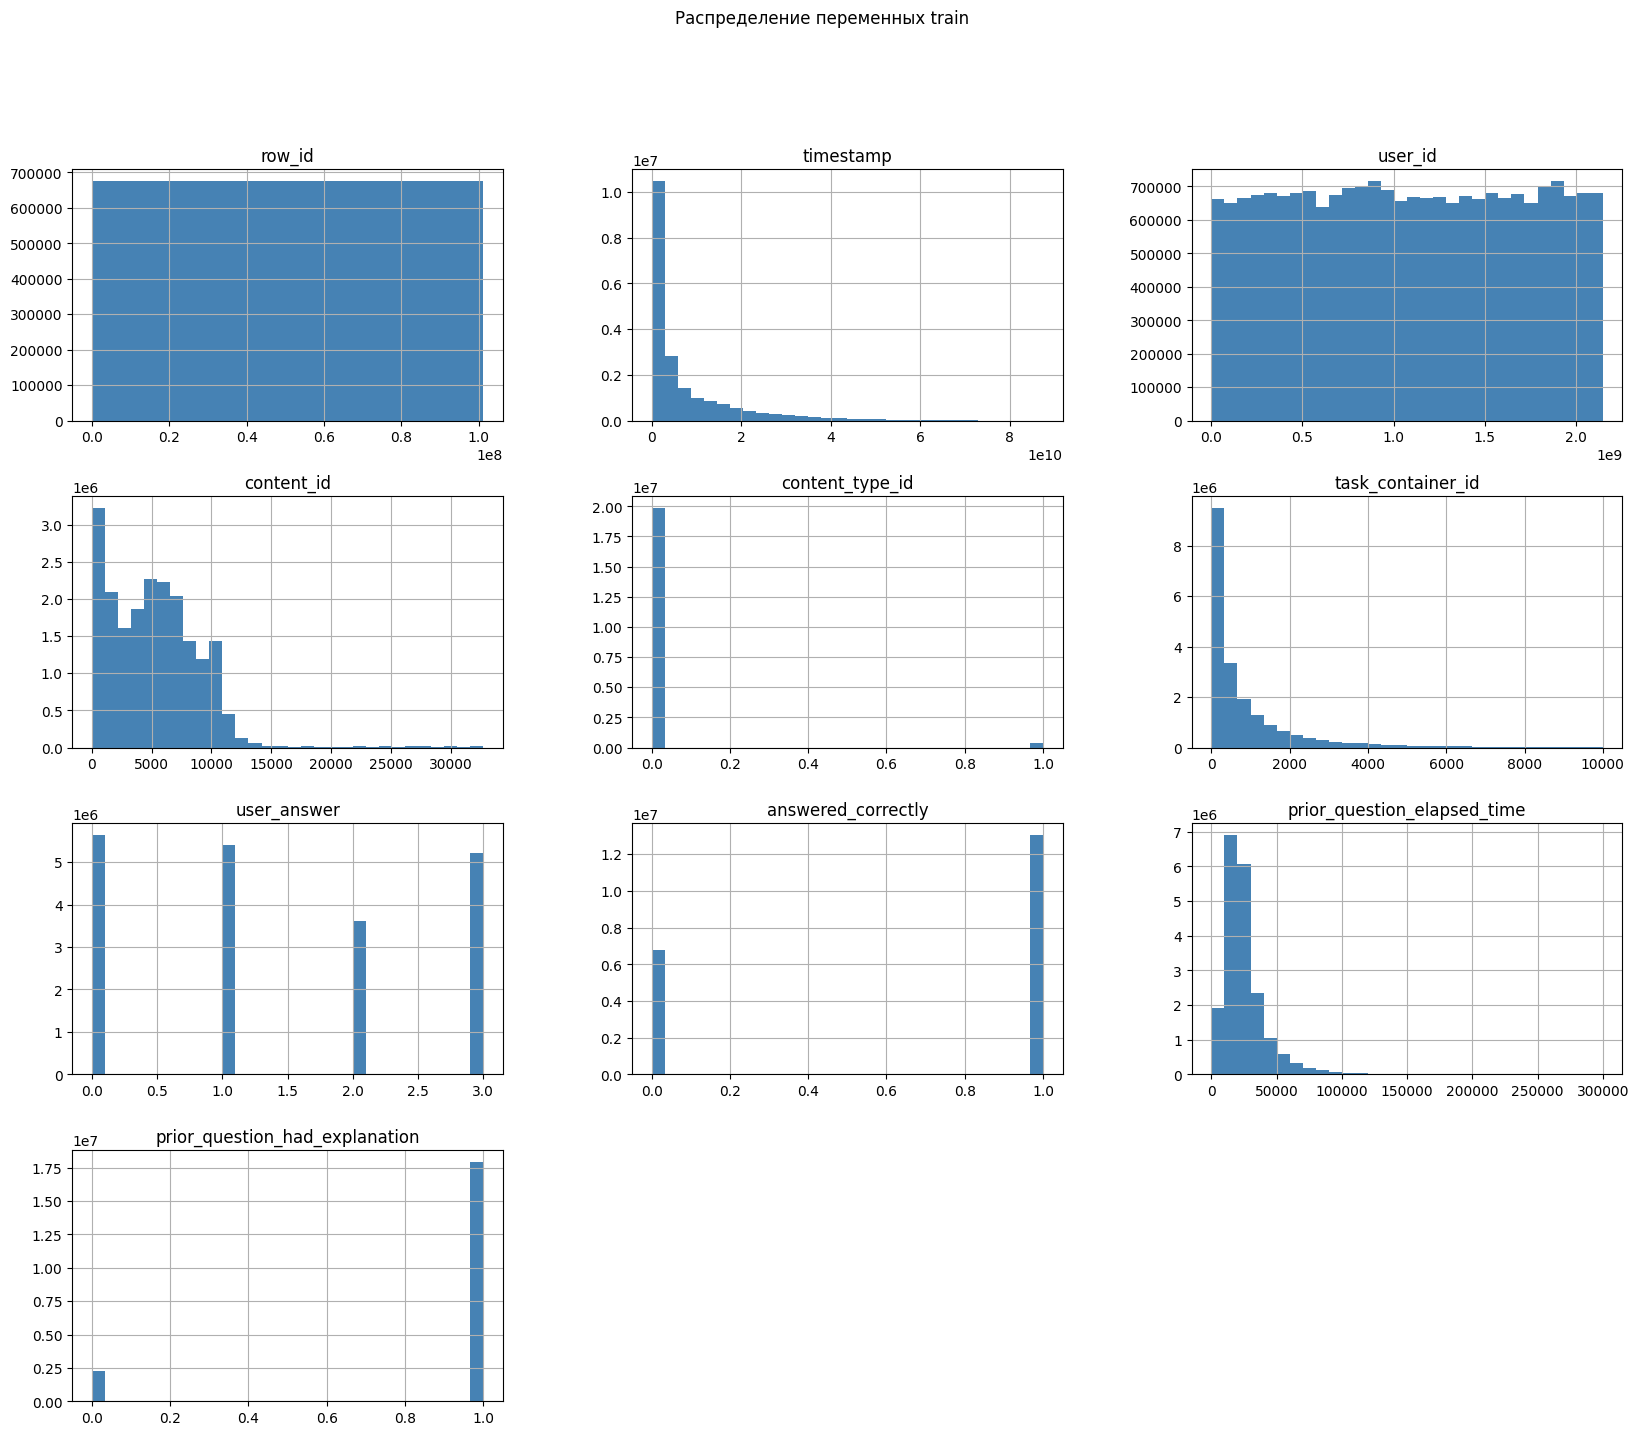

In [99]:
# train_df
train_df.hist(bins=30, figsize=(20, 16), color='steelblue')
plt.suptitle('Распределение переменных train')
plt.show()

Как мы можем увидеть, количество правильных ответов было более чем в два раза больше, чем неправильных. Также мы можем заметить, что количетсво голосов за каждый вариант при выборе ответа практически одинакове, кроме, ответа 2, который выбирали меньше. Эти два вывода помогают нам сделать предположение, что не было ситуации, в которой правильные ответы были в большинстве случаев, например, в ответе 0.

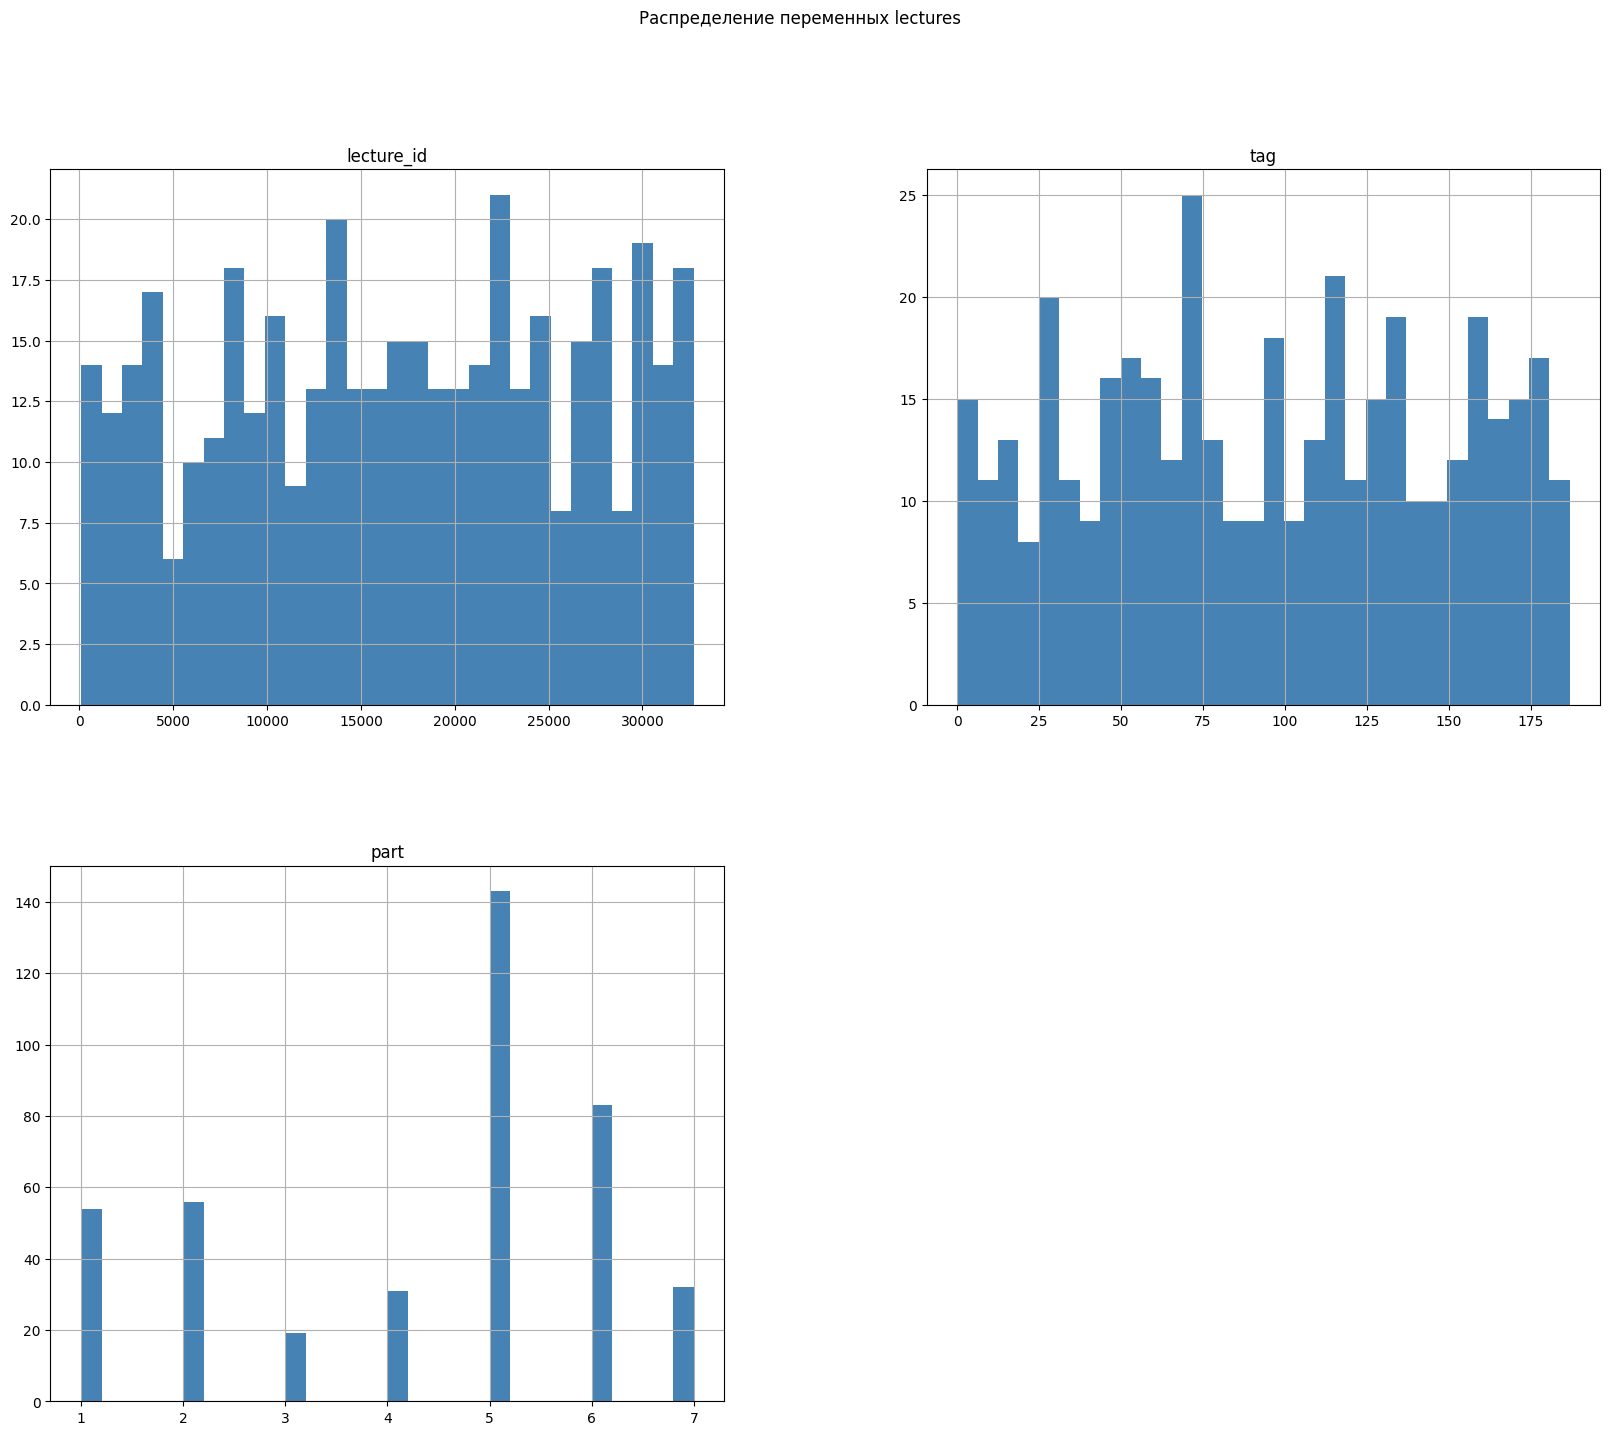

In [100]:
# lectures_df
lectures_df.hist(bins=30, figsize=(20, 16), color='steelblue')
plt.suptitle('Распределение переменных lectures')
plt.show()

Здесь мы видим, что большинство лекций было по теме 5, а меньше всего по теме 3


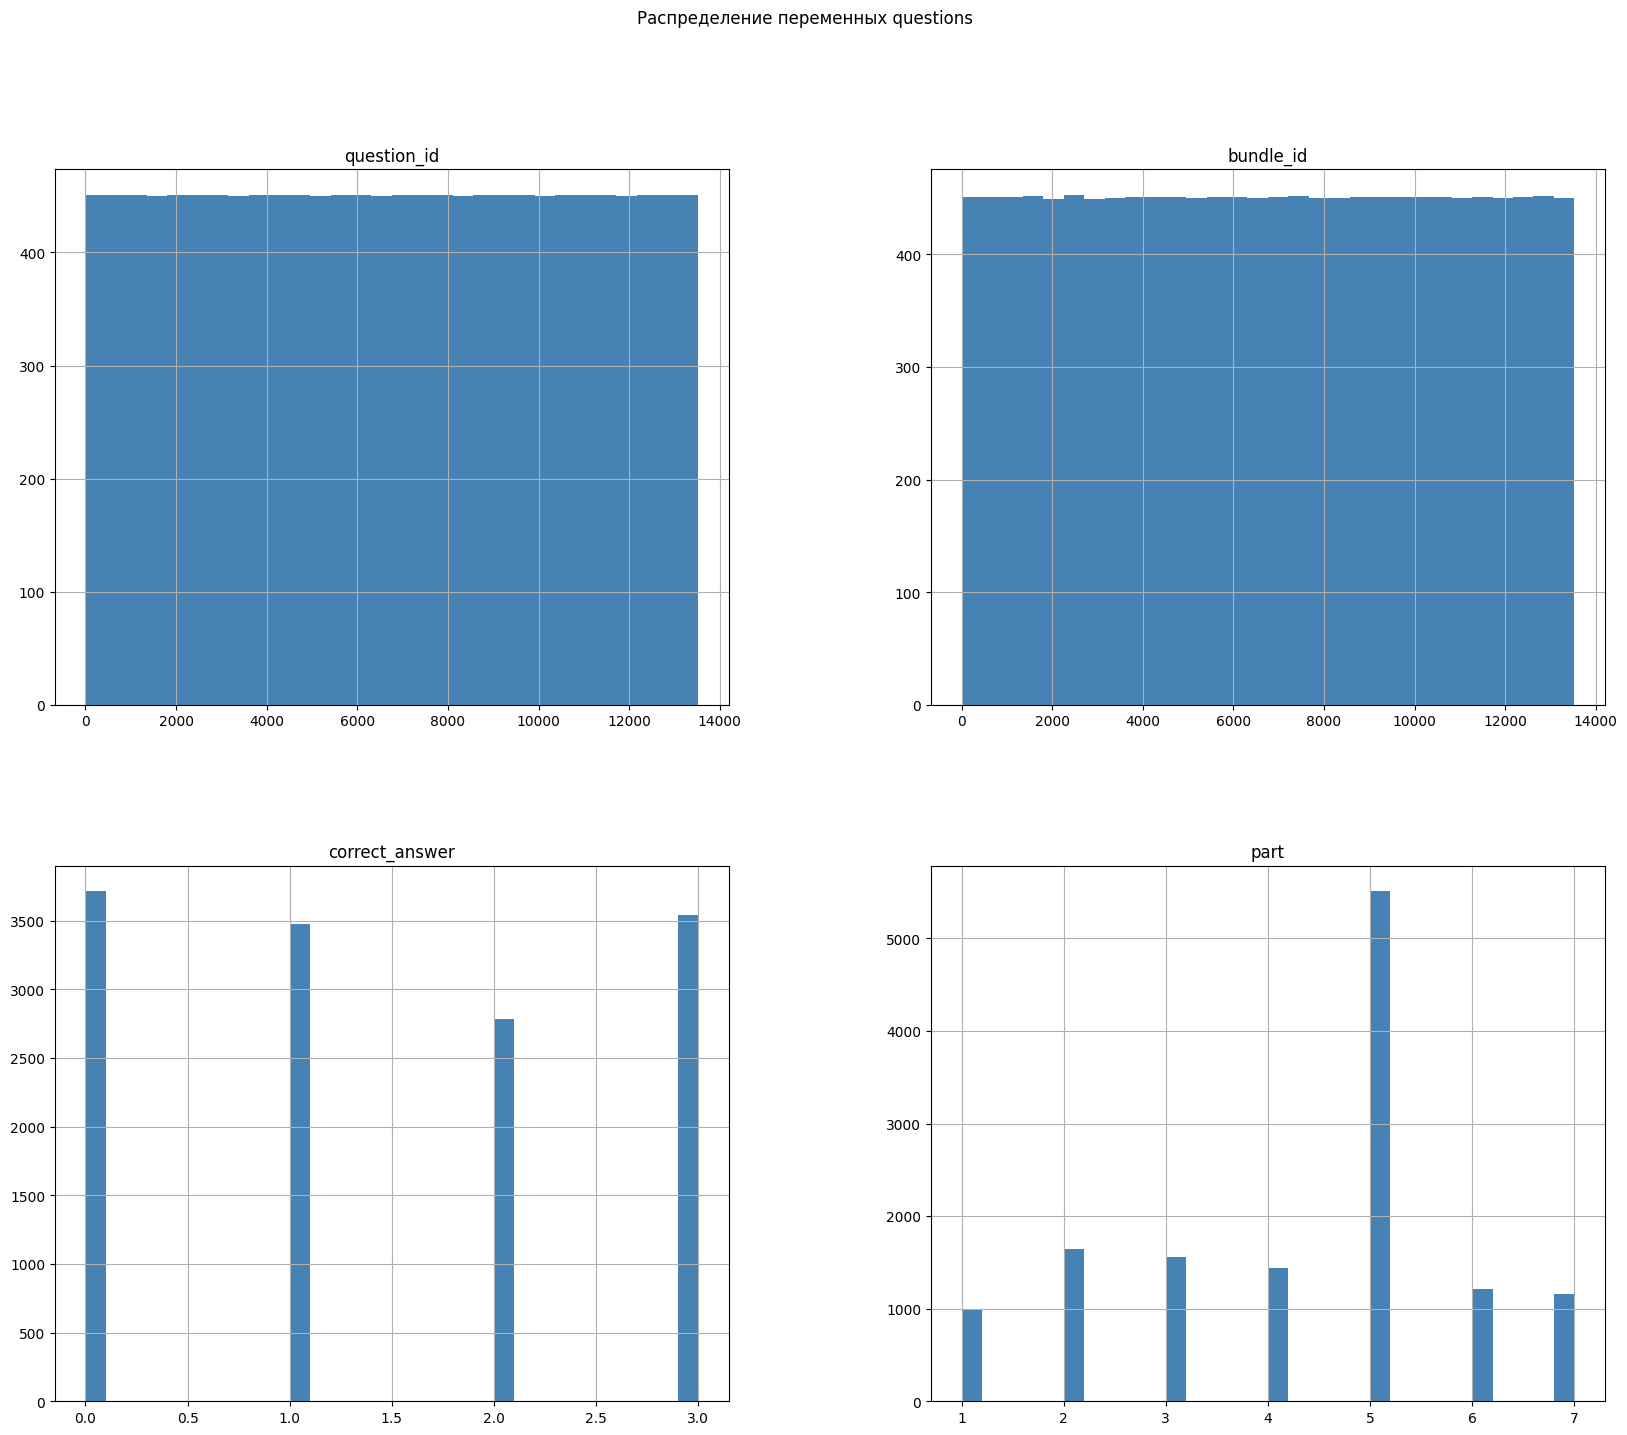

In [129]:
# questions_df
questions_df.hist(bins=30, figsize=(20, 16), color='steelblue')
plt.suptitle('Распределение переменных questions')
plt.show()

Здесь мы видим, что большинство ответов было по теме 5, как это было и в лекциях, однако количество вопросов по теме 3 не минимально, не смотря на минимальное количество лекций 

# 5. Корреляция признаков

Проведем анализ связи признаков между собой

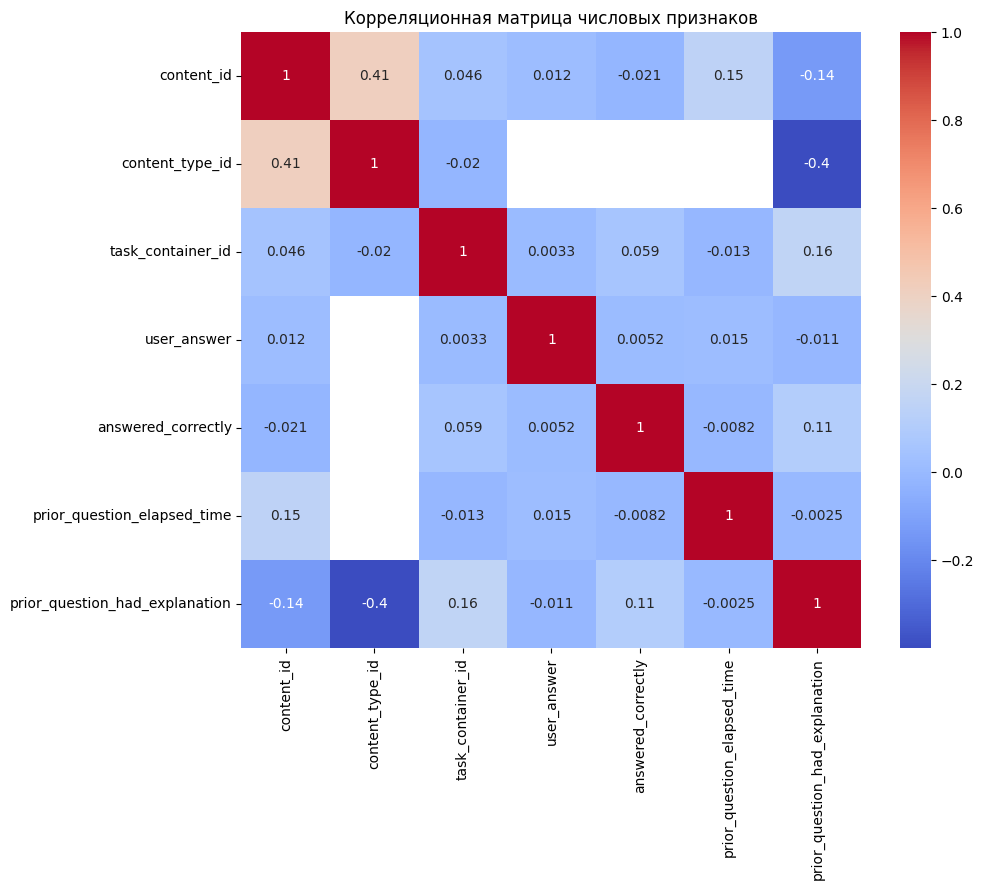

In [117]:
numeric_cols = train_df.select_dtypes(include=['int8', 'int16', 'float32'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

Явной корреляции между признаками в матрице нет.

Для дальнейшего анализа объединим train_df с questions_df, то есть берем где в  train_df 'content_type_id' = 0

In [130]:
train_questions_df = train_df[train_df['content_type_id'] == 0].merge(questions_df, how='left', left_on='content_id', right_on='question_id')

train_questions_df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,75721,11398613550,1581647,12143,0,141,0.0,1.0,17000.0,1.0,12143,12143,0,2,155 163 38 29
1,80184,5610705829,1765772,8647,0,702,0.0,1.0,41000.0,1.0,8647,8647,0,5,31
2,19864,13205626599,220268,593,0,1228,1.0,1.0,18000.0,1.0,593,593,1,2,143 71 38 29
3,76699,244918727,1657235,8345,0,52,2.0,1.0,25000.0,1.0,8345,8345,2,5,73
4,92991,2122352568,2034673,1217,0,229,1.0,1.0,17000.0,1.0,1217,1217,1,2,137 88 92 102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19853621,101203202,20794942191,2146986426,10328,0,1670,3.0,1.0,27500.0,1.0,10328,10328,3,6,133
19853622,101219003,250448,2147170757,2594,0,7,0.0,0.0,11000.0,0.0,2594,2593,2,4,161 103 102
19853623,101213000,12126053149,2147012157,7174,0,3291,1.0,1.0,57750.0,1.0,7174,7173,1,7,98 97 160 35 122 162
19853624,101220413,1034447762,2147192453,1363,0,228,1.0,1.0,15000.0,1.0,1363,1363,1,2,2 107 162 81 29


In [109]:
train_lectures_df = train_df[train_df['content_type_id'] == 1].merge(lectures_df, how='left', left_on='content_id', right_on='lecture_id')

train_lectures_df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,part,type_of
0,96852,9753284322,2041025,24250,1,1428,NaN,NaN,NaN,0.0,24250,109,5,concept
1,86411,15350403384,1864702,20474,1,2030,NaN,NaN,NaN,0.0,20474,95,5,concept
2,91957,1235953901,2026545,27845,1,452,NaN,NaN,NaN,0.0,27845,108,5,concept
3,690,12948802833,13134,21887,1,58,NaN,NaN,NaN,0.0,21887,119,2,concept
4,11040,585570108,107002,3153,1,49,NaN,NaN,NaN,0.0,3153,62,2,intention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392435,101213211,13340301142,2147012157,27954,1,3389,NaN,NaN,NaN,0.0,27954,156,5,solving question
392436,101218887,373930874,2147152761,24250,1,80,NaN,NaN,NaN,0.0,24250,109,5,concept
392437,101203860,21278348743,2146986426,14323,1,2065,NaN,NaN,NaN,0.0,14323,14,5,concept
392438,101227862,13802296725,2147419988,29695,1,174,NaN,NaN,NaN,0.0,29695,27,6,concept


Проведем анализ доли правильных ответов по каждой теме

In [119]:
# Группировка по столбцу 'part' и расчет среднего значения по 'answered_correctly'
correct_answer_rate = train_questions_df.groupby('part')['answered_correctly'].mean().reset_index()

# Переименование столбца для удобочитаемости
correct_answer_rate = correct_answer_rate.rename(columns={'answered_correctly': 'correct_answer_rate'})

# Вывод результатов
correct_answer_rate


,part,correct_answer_rate
0,1,0.745464
1,2,0.708772
2,3,0.701159
3,4,0.630685
4,5,0.610137
5,6,0.670094
6,7,0.659799


Выведим данный результат на график

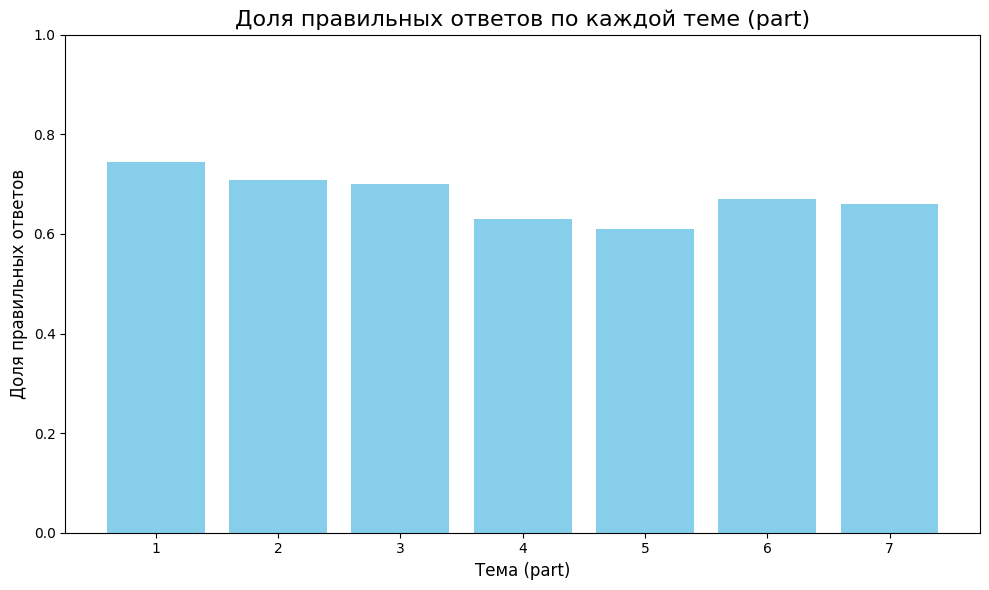

In [120]:
# Построение столбчатого графика
plt.figure(figsize=(10, 6))
plt.bar(correct_answer_rate['part'], correct_answer_rate['correct_answer_rate'], color='skyblue')

# Добавление заголовков и подписей
plt.title('Доля правильных ответов по каждой теме (part)', fontsize=16)
plt.xlabel('Тема (part)', fontsize=12)
plt.ylabel('Доля правильных ответов', fontsize=12)
plt.xticks(correct_answer_rate['part'])  # Обозначить все значения по оси X
plt.ylim(0, 1)  # Ограничить ось Y от 0 до 1, так как доля находится в этом диапазоне

# Показать график
plt.tight_layout()
plt.show()

Как можно заметить, лучше всего студенты отвечали на первую тему, а хуже всего на пятой, хотя там было больше всего лекций, можно сделать препожение, что тема пять является самой объемной и сложной для студентов

Проведем анализ времени на ответ (prior_question_elapsed_time) по темам

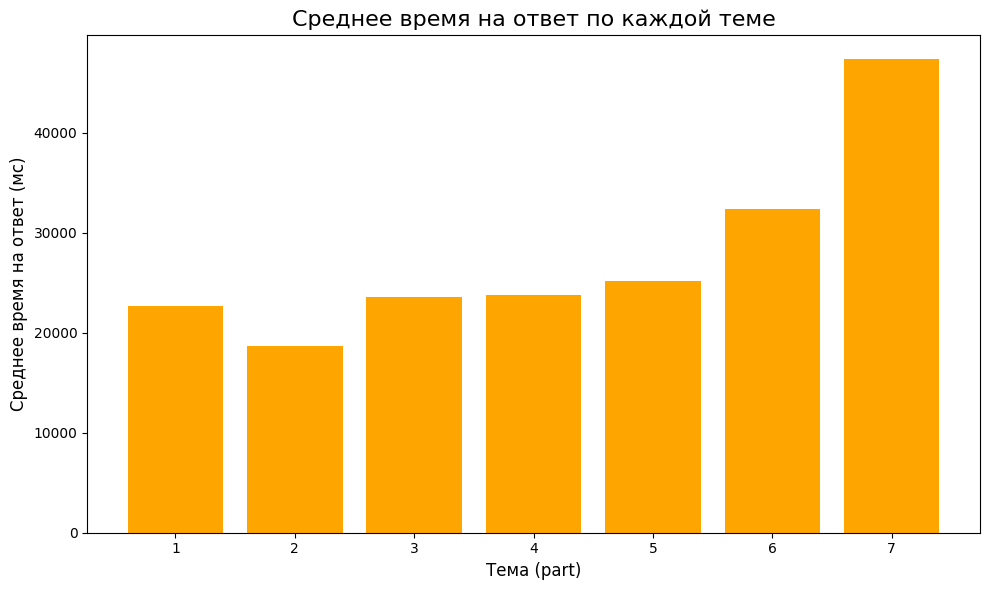

In [123]:
elapsed_time_by_part = train_questions_df.groupby('part')['prior_question_elapsed_time'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(elapsed_time_by_part['part'], elapsed_time_by_part['prior_question_elapsed_time'], color='orange')
plt.title('Среднее время на ответ по каждой теме', fontsize=16)
plt.xlabel('Тема (part)', fontsize=12)
plt.ylabel('Среднее время на ответ (мс)', fontsize=12)
plt.tight_layout()
plt.show()


Здесь мы можем заметить рост времени к 6 и 7 теме. Рост мог произойти после низких результатов в теме 5, из-за чего студенты больше времени думали над ответом

Анализ влияния объяснений на долю правильных ответов

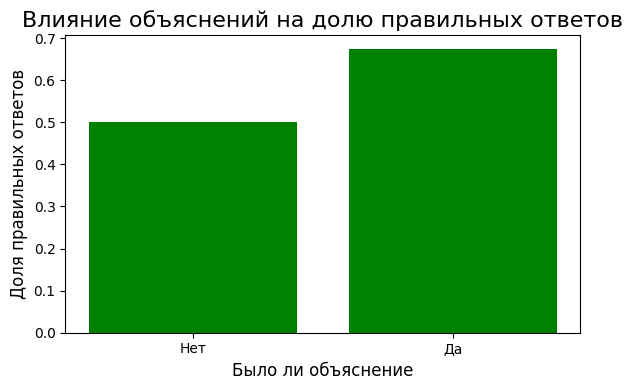

In [124]:
explanation_effect = train_questions_df.groupby('prior_question_had_explanation')['answered_correctly'].mean().reset_index()
plt.figure(figsize=(6, 4))
plt.bar(explanation_effect['prior_question_had_explanation'], explanation_effect['answered_correctly'], color='green')
plt.title('Влияние объяснений на долю правильных ответов', fontsize=16)
plt.xlabel('Было ли объяснение', fontsize=12)
plt.ylabel('Доля правильных ответов', fontsize=12)
plt.xticks([0, 1], ['Нет', 'Да'])
plt.tight_layout()
plt.show()


Здесь мы можем заметить, что почти в полтора раза больше студентов отвечали правильно на вопросы, если объясняли свой ответ

Анализ по группам пользователей.
Сгруппируем пользователей по их результатам: выделим группы пользователей с высокой, средней и низкой успешностью, а затем проанализируем их поведение — какие темы для них сложнее, сколько времени они тратят на ответы.

In [126]:
user_performance = train_questions_df.groupby('user_id')['answered_correctly'].mean().reset_index()

# Разделение пользователей на группы по успешности
user_performance['performance_group'] = pd.cut(user_performance['answered_correctly'], 
                                               bins=[0, 0.5, 0.8, 1], 
                                               labels=['Низкая', 'Средняя', 'Высокая'])

# Присоединение информации о группе пользователей к основному датафрейму
train_questions_df = train_questions_df.merge(user_performance[['user_id', 'performance_group']], on='user_id')

# Анализ сложных тем для разных групп пользователей (средняя доля правильных ответов по каждой теме и группе)
difficulty_by_group = train_questions_df.groupby(['performance_group', 'part'])['answered_correctly'].mean().reset_index()

# Анализ среднего времени ответа по группам и темам
time_by_group = train_questions_df.groupby(['performance_group', 'part'])['prior_question_elapsed_time'].mean().reset_index()

C:\Users\ksaga\AppData\Local\Temp\ipykernel_2268\28996521.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  difficulty_by_group = train_questions_df.groupby(['performance_group', 'part'])['answered_correctly'].mean().reset_index()
C:\Users\ksaga\AppData\Local\Temp\ipykernel_2268\28996521.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_by_group = train_questions_df.groupby(['performance_group', 'part'])['prior_question_elapsed_time'].mean().reset_index()


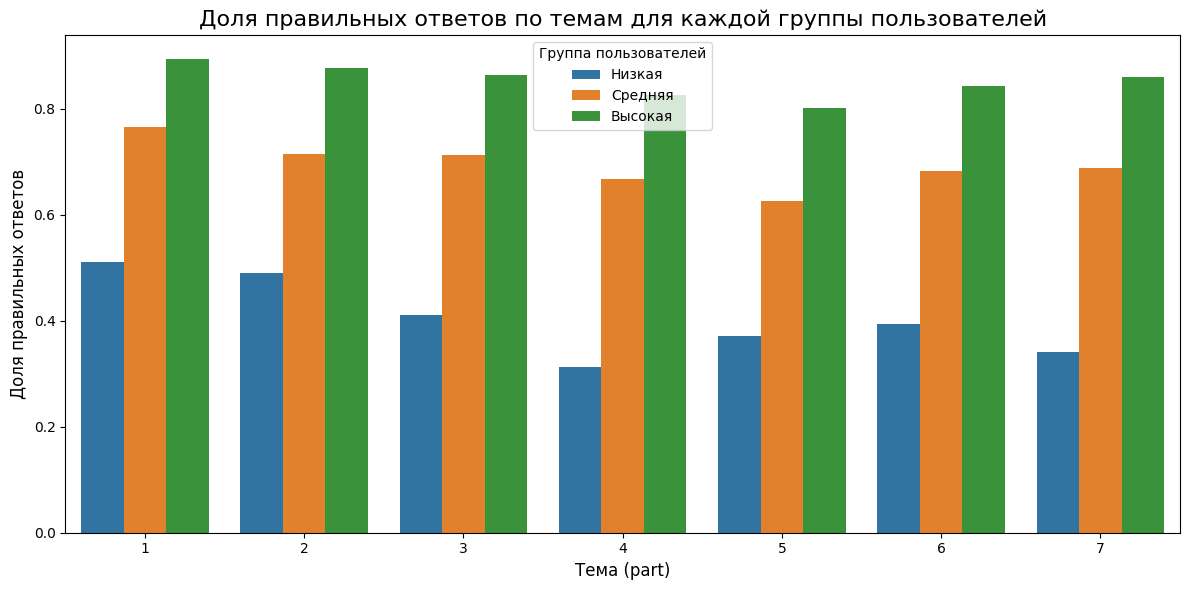

In [127]:
plt.figure(figsize=(12, 6))
sns.barplot(data=difficulty_by_group, x='part', y='answered_correctly', hue='performance_group')
plt.title('Доля правильных ответов по темам для каждой группы пользователей', fontsize=16)
plt.xlabel('Тема (part)', fontsize=12)
plt.ylabel('Доля правильных ответов', fontsize=12)
plt.legend(title='Группа пользователей')
plt.tight_layout()
plt.show()

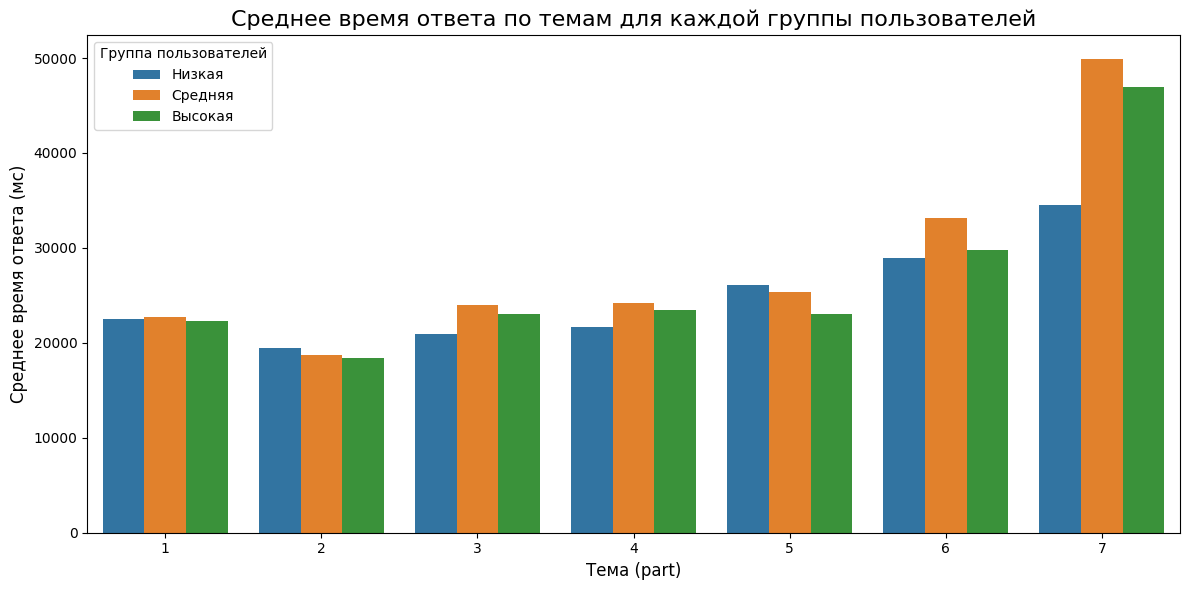

In [128]:
plt.figure(figsize=(12, 6))
sns.barplot(data=time_by_group, x='part', y='prior_question_elapsed_time', hue='performance_group')
plt.title('Среднее время ответа по темам для каждой группы пользователей', fontsize=16)
plt.xlabel('Тема (part)', fontsize=12)
plt.ylabel('Среднее время ответа (мс)', fontsize=12)
plt.legend(title='Группа пользователей')
plt.tight_layout()
plt.show()

По этим графикам можно сделать следующие выводы:
- Поведение студентов с низкой успеваемостью не сильно отличалось от поведения более успешных коллег в каждой теме
- В самом худшей по доле правильных ответов (5 тема) студенты с низкой успеваемостью больше времени тратили на ответ

# Выводы

Перед выводами объединим все дата фреймы в один

train_lectures_df = train_df[train_df['content_type_id'] == 1].merge(lectures_df, how='left', left_on='content_id', right_on='lecture_id')

students_df = pd.concat([train_questions_df, train_lectures_df], axis=0).sort_values('row_id').reset_index(drop=True)


К сожалению, оперативной памяти не хватает для вывода этого датафрейма

Нами был проведен анализ успеваемости студентов, который можно немного доработать (провести стандартизацию) и это будет подготовленный набор данных для ИИ. Важнейший результат, который нами был получен: больше всего студенты ошибались в теме 5, из-за чего они стали больше думать над ответами в следующтх темах